<center><h2>Henon-Heiles </h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS" by RH Landau, MJ Paez, and CC Bordeianu (deceased). Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2020. Please respect copyright & acknowledge our work."""

HenonHeiles.ipynb: solution of Henon Heiles equation for star motion about galactic center
  
$$
H(t)= \frac{1}{2}\bigl(p_x^2+p_y^2\bigr) +V(x,y), \ \ \ 
V(x,y)= \frac{1}{2}(x^2+y^2)+a\bigl(x^2 y -\frac{1}{3}y^3\bigr)
$$

In [1]:
# matplotlib notebook
import numpy as np
import matplotlib.pylab as plt  
from math import *

In [4]:
# Integration
nt=5000
tt = np.zeros((nt),float)              # time
xx = np.zeros((nt),float)              # position
yy = np.zeros((nt),float)            
vx = np.zeros((nt),float)              # velocity
vy = np.zeros((nt),float)    
py = np.zeros((nt),float)              # poincare section
ys = np.zeros((nt),float)              # poincare section
eps = 0.1

a=1.
def f(t,y):                            # RHS equation
    rhs = [0]*(4)   
    rhs[0] = y[2]                      # px
    rhs[1] = y[3]                      # py
    rhs[2] = -y[0]-2*y[0]*y[1]*a       # pxdot = -x-2xya
    rhs[3] = -y[1]-y[0]**2*a+y[1]**2*a # pydot = -y -x**2a+y**2a
    return rhs
    
def rk4(t,h,y,n):        
    k1 = [0.]*(n+1)
    k2 = [0.]*(n+1)
    k3 = [0.]*(n+1)
    k4 = [0.]*(n+1)
    fR = [0.]*(n+1)
    ydumb = [0.]*(n+1)
    fR = f(t, y)                   
    for i in range(0,n+1):
        k1[i]  =  h*fR[i]                    
    for i in range(0, n+1):
        ydumb[i]  =  y[i] + k1[i]/2.  
    fR = f(t + h/2.,ydumb)
    for i in range(0, n+1):
        k2[i] = h*fR[i]
        ydumb[i]  =  y[i] + k2[i]/2.    
    fR = f(t + h/2., ydumb)
    for i in range(0, n+1):
        k3[i] = h*fR[i]
        ydumb[i]  =  y[i] + k3[i] 
    fR = f(t + h, ydumb)
    for i in range(0, n+1):
        k4[i] = h*fR[i]
    for i in range(0, n+1):
        y[i]  =  y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6. # rk4
    return y

dt = 0.1        # time interval
y = [0]*(4)
y[0] = 0.       # init x
y[1] = 0.1      # init y
y[2] = 0.4374   # init px
y[3] = 0.1      # init py
f(0,y)      
i = 0
j = 0

for t in np.arange(0,500,dt):
    r = rk4(t,dt,y,3)     
    xx[i] = r[0]  
    yy[i] = r[1]
    vx[i] = r[2]
    vy[i] = r[3]
    if(xx[i]>-eps and xx[i]<eps):
        ys[j] = yy[i]
        py[j] = vy[i]
        j+= 1  
    if i == 0 or i%400 == 0:
        Energy = 0.5*(vx[i]**2+vy[i]**2 +xx[i]**2+yy[i]**2)+\
                a*xx[i]**2*yy[i]-a*(yy[i]**3)/3.0         
    i = i+1

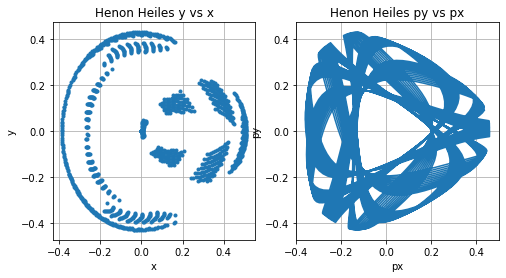

In [5]:
# Plots
fig, axes  =  plt.subplots(nrows = 1, ncols = 2,figsize = (8,4)) # big fig 
axes[0].plot(ys,py,'.') #ro' #xr')            
axes[0].grid()                           # position vs time
axes[0].set_title('Henon Heiles y vs x') # left figure
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[1].plot(vx,vy)                      # right figure phase diagram
axes[1].grid()
axes[1].set_title('Henon Heiles py vs px')  
axes[1].set_xlabel('px')
axes[1].set_ylabel('py')      
plt.show()